# freud.order.Hexatic: 2D Minkowski Structure Metrics

This demonstrates a variant of the hexatic order parameter $\psi_k$ that weighs each neighbor bond according to its corresponding side length in a Voronoi diagram of the system. This variant, called a Minkowski Structure Metric, is invariant under rotation, translation, and scaling. We denote the 2D Minkowski Structure Metric (the Voronoi-weighted form of the hexatic order parameter) as $\psi'_k$.

See also:
- https://morphometry.org/theory/anisotropy-analysis-by-imt/
- https://aip.scitation.org/doi/10.1063/1.4774084

In [1]:
import numpy as np
import freud
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from matplotlib.colorbar import Colorbar

In [2]:
def show_minkowski_structure_metrics(system):
    voro = freud.locality.Voronoi()
    voro.compute(system)
    voro.plot()
    for k in [0, 1, 2, 3, 4, 5, 6, 7, 8]:
        psi = freud.order.Hexatic(k=k, weighted=True)
        psi.compute(system, neighbors=voro.nlist)
        order = np.absolute(psi.particle_order)

        ax = voro.plot()
        patches = ax.collections[0]
        patches.set_array(order)
        patches.set_cmap('viridis')
        patches.set_clim(0, 1)
        patches.set_alpha(0.7)
        # Remove old colorbar coloring by number of sides
        ax.figure.delaxes(ax.figure.axes[-1])
        ax_divider = make_axes_locatable(ax)
        # Add a new colorbar to the right of the main axes.
        cax = ax_divider.append_axes("right", size="7%", pad="2%")
        cbar = Colorbar(cax, patches)
        cbar.set_label("$\psi'_{k}$".format(k=k), size=20)
        ax

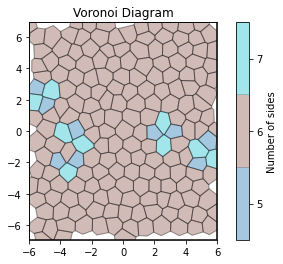

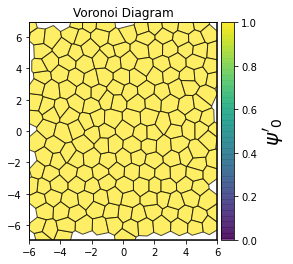

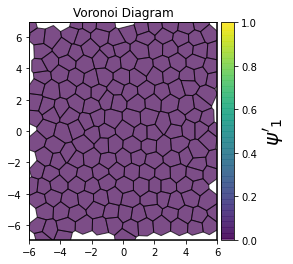

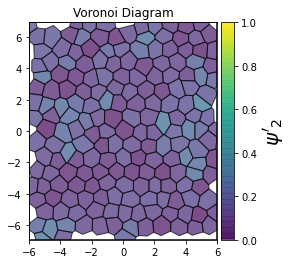

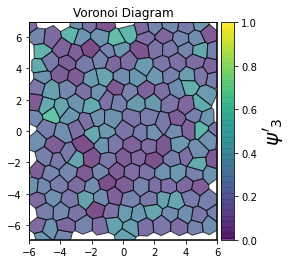

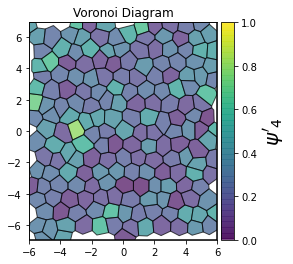

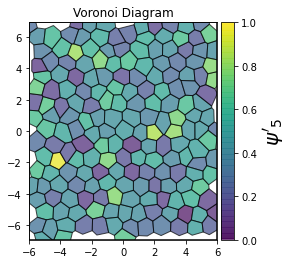

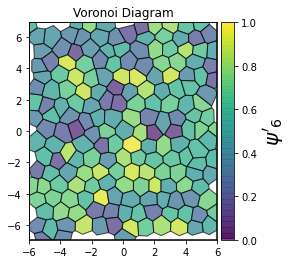

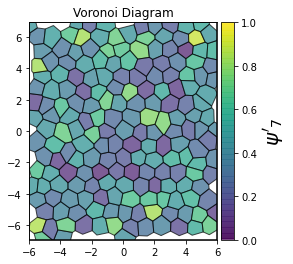

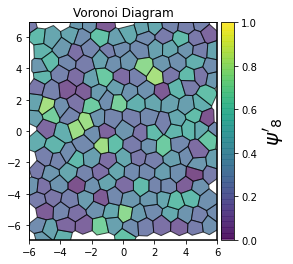

In [3]:
unit_cell = freud.data.UnitCell.hex()
system = unit_cell.generate_system(num_replicas=[12, 8, 1], sigma_noise=0.15)
show_minkowski_structure_metrics(system)

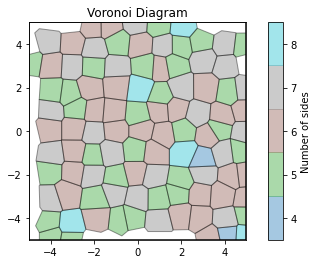

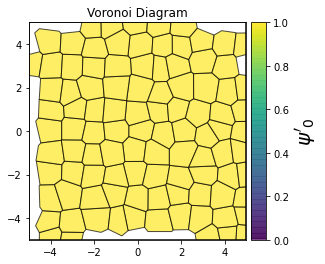

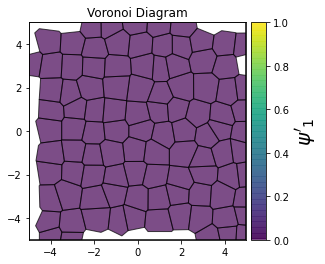

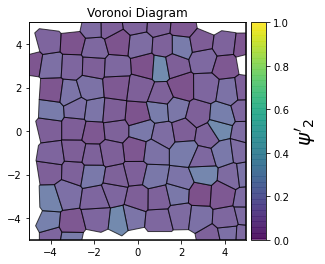

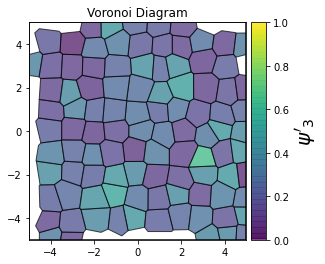

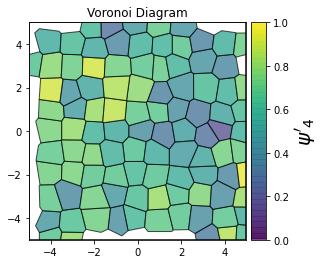

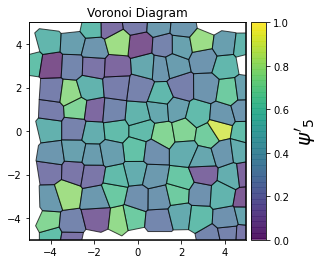

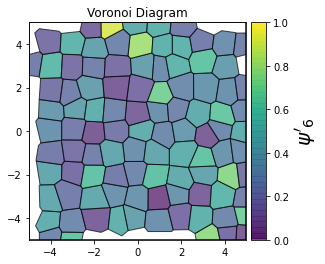

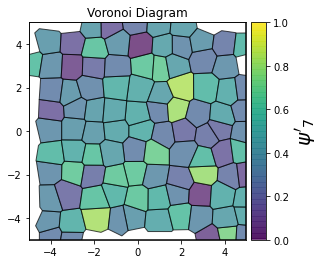

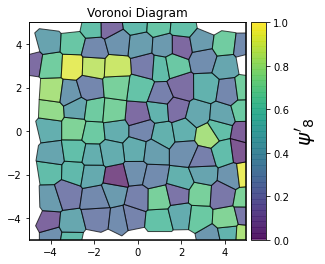

In [4]:
unit_cell = freud.data.UnitCell.square()
system = unit_cell.generate_system(num_replicas=10, sigma_noise=0.15)
show_minkowski_structure_metrics(system)